# Reshaping data with `stack` and `unstack`

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-deep', 'seaborn-darkgrid', 'seaborn-notebook'])

pd.options.display.max_rows = 8

## Case study: air quality data of European monitoring stations (AirBase)

Going further with the time series case study [test](05 - Time series data.ipynb) on the AirBase (The European Air quality dataBase) data: the actual data downloaded from the Airbase website did not look like a nice csv file (`data/airbase_data.csv`).

One of the actual downloaded raw data files of AirBase is included in the repo:

In [3]:
!head -1 ./data/BETR8010000800100hour.1-1-1990.31-12-2012

1990-01-01	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0


Just reading the tab-delimited data:

In [4]:
data = pd.read_csv("data/BETR8010000800100hour.1-1-1990.31-12-2012", sep='\t')#, header=None)

In [5]:
data.head()

,1990-01-01,-999.000,0,-999.000.1,0.1,-999.000.2,0.2,-999.000.3,0.3,-999.000.4,...,-999.000.19,0.19,-999.000.20,0.20,-999.000.21,0.21,-999.000.22,0.22,-999.000.23,0.23
0,1990-01-02,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,...,57.0,1,58.0,1,54.0,1,49.0,1,48.0,1
1,1990-01-03,51.0,1,50.0,1,47.0,1,48.0,1,51.0,...,84.0,1,75.0,1,-999.0,0,-999.0,0,-999.0,0
2,1990-01-04,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,...,69.0,1,65.0,1,64.0,1,60.0,1,59.0,1
3,1990-01-05,51.0,1,51.0,1,48.0,1,50.0,1,51.0,...,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,0
4,1990-01-06,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,...,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,0


The above data is clearly not ready to be used! Each row contains the 24 measurements for each hour of the day, and also contains a flag (0/1) indicating the quality of the data.

<div class="alert alert-success">
    <b>EXERCISE</b>: Clean up this dataframe using more options of `read_csv`
</div>

- specify that the values of -999 and -9999 should be regarded as NaN
- specify are own column names (http://stackoverflow.com/questions/6356041/python-intertwining-two-lists)

In [6]:
hours = ["{:02d}".format(i) for i in range(24)]

In [7]:
colnames = ['date'] + [item for pair in zip(hours, ['flag']*24) for item in pair]

data = pd.read_csv("data/BETR8010000800100hour.1-1-1990.31-12-2012",
                   sep='\t', header=None, na_values=[-999, -9999], names=colnames)

In [8]:
data.head()

,date,00,flag,01,flag.1,02,flag.2,03,flag.3,04,...,19,flag.19,20,flag.20,21,flag.21,22,flag.22,23,flag.23
0,1990-01-01,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1,1990-01-02,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,57.0,1,58.0,1,54.0,1,49.0,1,48.0,1
2,1990-01-03,51.0,1,50.0,1,47.0,1,48.0,1,51.0,...,84.0,1,75.0,1,NaN,0,NaN,0,NaN,0
3,1990-01-04,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,69.0,1,65.0,1,64.0,1,60.0,1,59.0,1
4,1990-01-05,51.0,1,51.0,1,48.0,1,50.0,1,51.0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0


For now, we disregard the 'flag' columns

In [9]:
data = data.drop('flag', axis=1)
data

,date,00,01,flag.1,02,flag.2,03,flag.3,04,flag.4,...,19,flag.19,20,flag.20,21,flag.21,22,flag.22,23,flag.23
0,1990-01-01,NaN,NaN,0,NaN,0,NaN,0,NaN,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1,1990-01-02,NaN,NaN,0,NaN,0,NaN,0,NaN,0,...,57.0,1,58.0,1,54.0,1,49.0,1,48.0,1
2,1990-01-03,51.0,50.0,1,47.0,1,48.0,1,51.0,1,...,84.0,1,75.0,1,NaN,0,NaN,0,NaN,0
3,1990-01-04,NaN,NaN,0,NaN,0,NaN,0,NaN,0,...,69.0,1,65.0,1,64.0,1,60.0,1,59.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,2012-12-28,26.5,28.5,1,35.5,1,32.0,1,35.5,1,...,46.5,1,42.5,1,38.5,1,30.5,1,26.5,1
8389,2012-12-29,21.5,16.5,1,13.0,1,13.0,1,16.0,1,...,21.0,1,22.0,1,20.5,1,20.0,1,15.0,1
8390,2012-12-30,11.5,9.5,1,7.5,1,7.5,1,10.0,1,...,25.0,1,18.5,1,17.0,1,15.5,1,12.5,1
8391,2012-12-31,9.5,8.5,1,8.5,1,8.5,1,10.5,1,...,21.0,1,16.5,1,14.5,1,16.5,1,15.0,1


Now, we want to reshape it: our goal is to have the different hours as row indices, merged with the date into a datetime-index.

## Overview: reshaping your data with `stack`, `unstack` and `pivot`

The docs say:

> Pivot a level of the (possibly hierarchical) column labels, returning a
DataFrame (or Series in the case of an object with a single level of
column labels) having a hierarchical index with a new inner-most level
of row labels.

<img src="img/stack.png" width=70%>

In [10]:
df = pd.DataFrame({'A':['one', 'one', 'two', 'two'], 'B':['a', 'b', 'a', 'b'], 'C':range(4)})
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


To use `stack`/`unstack`, we need the values we want to shift from rows to columns or the other way around as the index:

In [11]:
df = df.set_index(['A', 'B'])
df

C
A   B   
one a  0
    b  1
two a  2
    b  3

In [12]:
result = df['C'].unstack()
result

B,a,b
A,,
one,0,1
two,2,3


In [13]:
df = result.stack().reset_index(name='C')
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


`pivot` is similar to `unstack`, but let you specify column names:

In [14]:
df.pivot(index='A', columns='B', values='C')

B,a,b
A,,
one,0,1
two,2,3


`pivot_table` is similar as `pivot`, but can work with duplicate indices and let you specify an aggregation function:

In [15]:
df = pd.DataFrame({'A':['one', 'one', 'two', 'two', 'one', 'two'], 'B':['a', 'b', 'a', 'b', 'a', 'b'], 'C':range(6)})
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3
4,one,a,4
5,two,b,5


In [16]:
df.pivot_table(index='A', columns='B', values='C', aggfunc='count') #'mean'

B,a,b
A,,
one,2,1
two,1,2


## Back to our case study

We can now use `stack` and some other functions to create a timeseries from the original dataframe:

In [25]:
colnames = ['date'] + [item for pair in zip(["{:02d}".format(i) for i in range(24)], ['flag']*24) for item in pair]

data = pd.read_csv("data/BETR8010000800100hour.1-1-1990.31-12-2012",
                   sep='\t', header=None, na_values=[-999, -9999], names=colnames)
data = data.drop([n for n in data.columns if 'flag' in n], axis=1)

In [26]:
data.head()

,date,00,01,02,03,04,05,06,07,08,...,14,15,16,17,18,19,20,21,22,23
0,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.0,59.0,58.0,59.0,58.0,57.0,58.0,54.0,49.0,48.0
2,1990-01-03,51.0,50.0,47.0,48.0,51.0,52.0,58.0,57.0,NaN,...,69.0,74.0,NaN,NaN,103.0,84.0,75.0,NaN,NaN,NaN
3,1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,71.0,74.0,70.0,70.0,69.0,65.0,64.0,60.0,59.0
4,1990-01-05,51.0,51.0,48.0,50.0,51.0,58.0,65.0,66.0,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-success">
    <b>EXERCISE</b>: Reshape the dataframe to a timeseries
</div>

The end result should look like:


<div>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>BETR801</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1990-01-02 09:00:00</th>
      <td>48.0</td>
    </tr>
    <tr>
      <th>1990-01-02 12:00:00</th>
      <td>48.0</td>
    </tr>
    <tr>
      <th>1990-01-02 13:00:00</th>
      <td>50.0</td>
    </tr>
    <tr>
      <th>1990-01-02 14:00:00</th>
      <td>55.0</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
    </tr>
    <tr>
      <th>2012-12-31 20:00:00</th>
      <td>16.5</td>
    </tr>
    <tr>
      <th>2012-12-31 21:00:00</th>
      <td>14.5</td>
    </tr>
    <tr>
      <th>2012-12-31 22:00:00</th>
      <td>16.5</td>
    </tr>
    <tr>
      <th>2012-12-31 23:00:00</th>
      <td>15.0</td>
    </tr>
  </tbody>
</table>
<p>170794 rows × 1 columns</p>
</div>

First, reshape the dataframe so that each row consists of one observation for one date + hour combination:

In [27]:
data = data.set_index('date')

In [28]:
data_stacked = data.stack()

In [29]:
data_stacked

date          
1990-01-02  09    48.0
            12    48.0
            13    50.0
            14    55.0
                  ... 
2012-12-31  20    16.5
            21    14.5
            22    16.5
            23    15.0
dtype: float64

Now, combine the date and hour colums into a datetime (tip: string columns can be summed to concatenate the strings):

In [30]:
data_stacked = data_stacked.reset_index(name='BETR801')

In [31]:
data_stacked.head()

,date,level_1,BETR801
0,1990-01-02,09,48.0
1,1990-01-02,12,48.0
2,1990-01-02,13,50.0
3,1990-01-02,14,55.0
4,1990-01-02,15,59.0


In [32]:
data_stacked.index = pd.to_datetime(data_stacked['date'] + data_stacked['level_1'], format="%Y-%m-%d%H")

In [33]:
data_stacked = data_stacked.drop(['date', 'level_1'], axis=1)

In [34]:
data_stacked

,BETR801
1990-01-02 09:00:00,48.0
1990-01-02 12:00:00,48.0
1990-01-02 13:00:00,50.0
1990-01-02 14:00:00,55.0
...,...
2012-12-31 20:00:00,16.5
2012-12-31 21:00:00,14.5
2012-12-31 22:00:00,16.5
2012-12-31 23:00:00,15.0


<div class="alert alert-success">
    <b>QUESTION</b>: What is the difference in the typical diurnal profile between week and weekend days? (and visualise it)
</div>

In [35]:
# use the data of above
data = data_stacked
# or read from the processed csv file
#data = pd.read_csv('data/airbase_data.csv', index_col=0, parse_dates=True, na_values=[-9999])[['BETR801']]
#data = data['1999':]

In [36]:
data.index.weekday?

In [37]:
data['weekday'] = data.index.weekday

Add a column indicating week/weekend

In [38]:
data['weekend'] = data['weekday'].isin([5, 6])

In [39]:
data_weekend = data.groupby(['weekend', data.index.hour]).mean()
data_weekend.head()

BETR801   weekday
weekend                       
False   0  40.008066  2.009869
        1  38.281875  2.008576
        2  38.601189  2.007098
        3  42.633946  2.007737
        4  49.853566  2.012471

In [40]:
data_weekend_BETR801 = data_weekend['BETR801'].unstack(level=0)
data_weekend_BETR801.head()

weekend,False,True
0,40.008066,42.606821
1,38.281875,39.698565
2,38.601189,37.649595
3,42.633946,36.971797
4,49.853566,37.908454


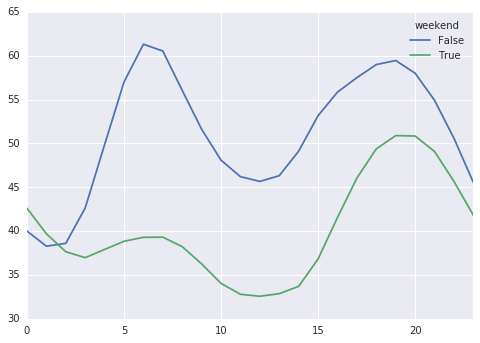

In [41]:
data_weekend_BETR801.plot()

In [42]:
data = data.drop(['weekday', 'weekend'], axis=1)

<div class="alert alert-success">
    <b>QUESTION</b>: Visualize the typical week profile for the different stations as boxplots (where the values in one boxplot are the daily means for the different weeks for a certain weekday).
</div>

Tip: the boxplot method of a DataFrame expects the data for the different boxes in different columns). For this, you can either use `pivot_table` as a combination of `groupby` and `unstack`

In [43]:
# add a weekday and week column
data['weekday'] = data.index.weekday
data['week'] = data.index.week
data.head()

,BETR801,weekday,week
1990-01-02 09:00:00,48.0,1,1
1990-01-02 12:00:00,48.0,1,1
1990-01-02 13:00:00,50.0,1,1
1990-01-02 14:00:00,55.0,1,1
1990-01-02 15:00:00,59.0,1,1


In [44]:
# pivot table so that the weekdays are the different columns
data_pivoted = data['2012'].pivot_table(columns='weekday', index='week', values='BETR801')
data_pivoted.head()

weekday,0,1,2,3,4,5,6
week,,,,,,,
1,28.545455,25.727273,30.260870,22.704545,44.473684,27.113636,39.590909
2,55.227273,60.113636,50.250000,42.550000,58.704545,68.181818,68.568182
3,73.704545,113.863636,61.045455,43.636364,43.363636,28.826087,22.340909
4,46.944444,71.659091,57.565217,59.833333,65.818182,50.181818,29.500000
5,47.775000,53.750000,41.318182,44.227273,72.250000,76.409091,68.500000


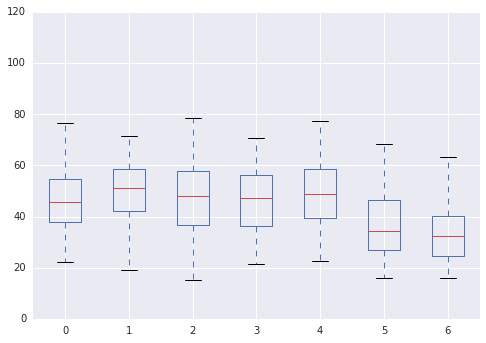

In [45]:
box = data_pivoted.boxplot()

An alternative method using `groupby` and `unstack`:

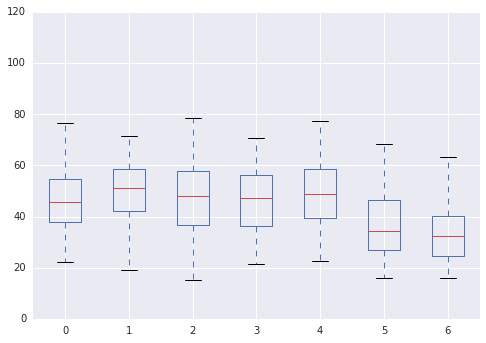

In [46]:
data['2012'].groupby(['weekday', 'week'])['BETR801'].mean().unstack(level=0).boxplot();

## We can also use the reshaping methods with the movie data

In [38]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [39]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


<div class="alert alert-success">
    <b>EXERCISE</b>: Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?
</div>

In [40]:
c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
c = c.groupby(['year', 'character']).size()
c = c.unstack()
c = c.fillna(0)
c.head()

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0


In [41]:
d = c.Superman - c.Batman
print('Superman years:')
print(len(d[d > 0.0]))

Superman years:
12


<div class="alert alert-success">
    <b>EXERCISE</b>: Plot the number of actor roles each year and the number of actress roles each year over the history of film.
</div>

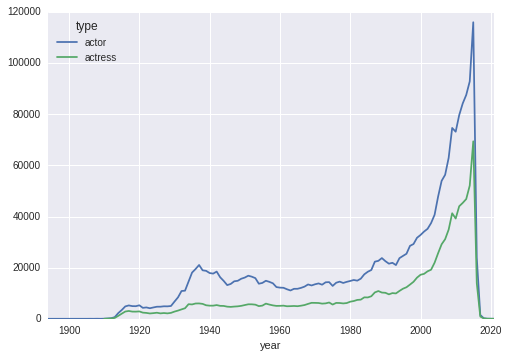

In [42]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c.plot()

<div class="alert alert-success">
    <b>EXERCISE</b>: Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.
</div>

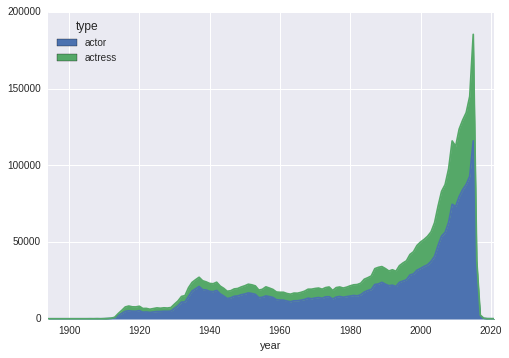

In [43]:
c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c.plot(kind='area')